In [10]:
import matplotlib.pyplot as plt
import numpy as np

$$
\eta_{ij} = \sqrt{(\vec{k}-\vec{q}_i)^2+m^2}+\sqrt{(\vec{k}-\vec{q}_j)^2+m^2}+q^0_i-q^0_j
$$

In [11]:
qs = None
qt = None
m = None


def e(k, i):
    return np.sqrt((k-qs[i])**2 + m**2)

def elipt(k, i, j):
    return e(k,i)+e(k,j)+qt[i]-qt[j]


def reparameterize(i, j):
    global qs, qt
    avg_s = (qs[i]+qs[j])/2
    avg_t = (qt[i]+qt[j])/2
    qs = qs-avg_s
    qt = qt-avg_t

def get_zero(i, j):
    assert (qs[i] == -qs[j] and qt[i] == -qt[j]), "Not correctly reparameterized!"
    q_2 = qt[i]**2-qs[i]**2
    return np.sqrt((q_2-m**2)/(1-qs[i]**2/qt[i]**2))

def get_derivative(i, j, r):
    return (r-qs[i])/e(r,i) + (r-qs[j])/e(r,j)

def counter_term(i, j, k, rad):
    r = get_zero(i, j)
    der = get_derivative(i,j,r)
    return 1/((k-r)*der) * (np.abs(k.real-r.real) < rad) - 1/((k+r)*der) * (np.abs(k.real+r.real) < rad)


def counter_term_int(i, j, rad):
    r = get_zero(i, j)
    der = get_derivative(i,j,r)
    return 1j*(2*np.atan(-r.imag/rad)-np.pi) / der



We want to find the 0
$$
\eta_{ij} = \sqrt{(\vec{k}-\vec{q}_i)^2+m^2}+\sqrt{(\vec{k}-\vec{q}_j)^2+m^2}+q^0_i-q^0_j = 0
$$
Consider:
$$
\sqrt{A}+\sqrt{B} + C = 0
$$
$$
A+B+2\sqrt{AB} = C^2
$$
$$
4AB = (C^2-(A+B))^2
$$
Let WLOG $q_i = -q_j = q$. and $\vec{q}^2 + m^2 = Q$
we then have:
$$
A = \vec{k}^2-2\vec{k}\vec{q}+Q
$$
$$
B = \vec{k}^2+2\vec{k}\vec{q}+Q
$$
$$
C = 2 q^0
$$
Inserting these into the result and dividing by 4 we get
$$
((\vec{k}^2-2\vec{k}\vec{q}+Q))(\vec{k}^2+2\vec{k}\vec{q}+Q)
=
(2{q^0}^2 - \vec{k}^2 - Q)^2
$$
$$
(\vec{k}^2+Q)^2-4(\vec{k}\vec{q})^2 =(\vec{k}^2+Q)^2 - 2(\vec{k}^2+Q)(2{q^0}^2)+ 4{q^0}^4
$$
Canceling terms and again dividing by 4 we get
$$
(\vec{k}\vec{q})^2-(\vec{k}^2+Q){q^0}^2+{q^0}^4 = 0
$$
Let's parameterize $\vec{k} = r\vec{\sigma}$
$$
r^2 = (Q-{q^0}^2) \frac{{q^0}^2}{(\vec{\sigma}\vec{q})^2 - {q^0}^2}
$$

In [12]:
def plot_counterterm(i, j, xs, rad):
    reparameterize(i,j)
    elipt_ = elipt(xs, i, j)
    elipt_inv = 1/elipt_
    ct = counter_term(i, j, xs, rad)
    sum_ = elipt_inv-ct

    thresh_int = counter_term_int(i, j, rad)

    naive_int = sum(elipt_inv) * (xs[1]-xs[0])
    thresh_int = sum(sum_)* (xs[1]-xs[0]) + thresh_int

    print(f'q = ({qs[i]:.3f} {qt[i]:.3f})')
    print(f'm = ({m:.3f})')

    print(f'naive integral:      {naive_int:.3f}')
    print(f'threshold subtacted: {thresh_int:.3f}')


    plt.figure(figsize=(20,4))

    plt.subplot(1, 4, 1)
    plt.title(f"$\\eta_{{{i}{j}}}$")
    plt.plot(xs, elipt_.real, label = 're')
    plt.plot(xs, elipt_.imag, label = 'im')


    plt.subplot(1, 4, 2)
    plt.title(f"$1/\\eta_{{{i}{j}}}$")
    plt.plot(xs, elipt_inv.real, label = 're')
    plt.plot(xs, elipt_inv.imag, label = 'im')

    plt.subplot(1, 4, 3)
    plt.title(f"counterterm")
    plt.plot(xs, ct.real, label = 're')
    plt.plot(xs, ct.imag, label = 'im')


    plt.subplot(1, 4, 4)
    plt.title(f"sum")
    plt.plot(xs, sum_.real, label = 're')
    plt.plot(xs, sum_.imag, label = 'im')

    plt.legend()
    plt.show()

q = (-1.500+0.000j -2.000+0.000j)
m = (1.000)
naive integral:      -28.959+0.000j
threshold subtacted: -1.834-4.162j


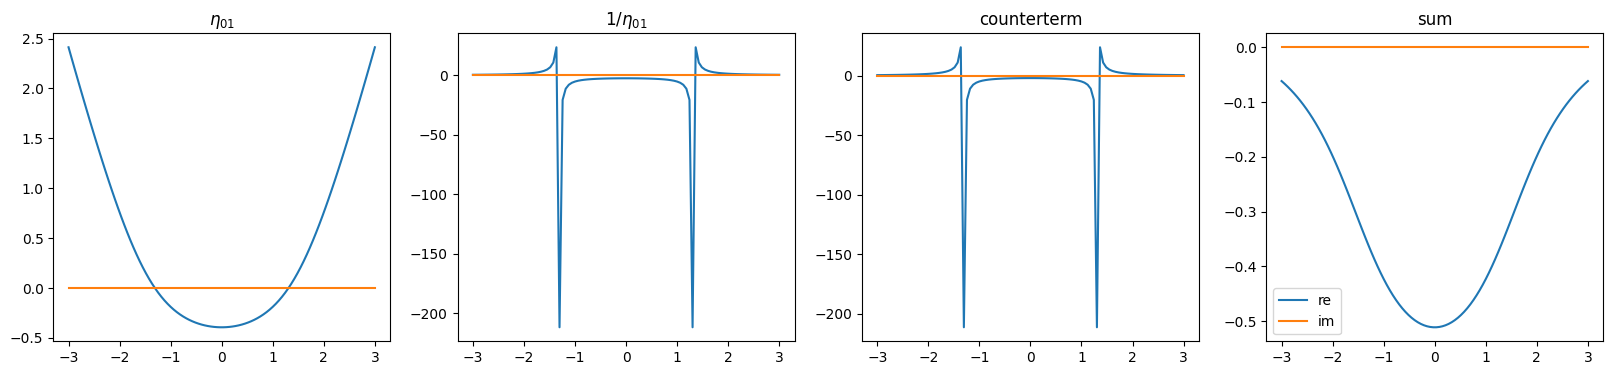

q = (-1.500+0.000j -2.000+0.000j)
m = (1.000+0.010j)
naive integral:      -6.256-10.583j
threshold subtacted: -1.743-4.171j


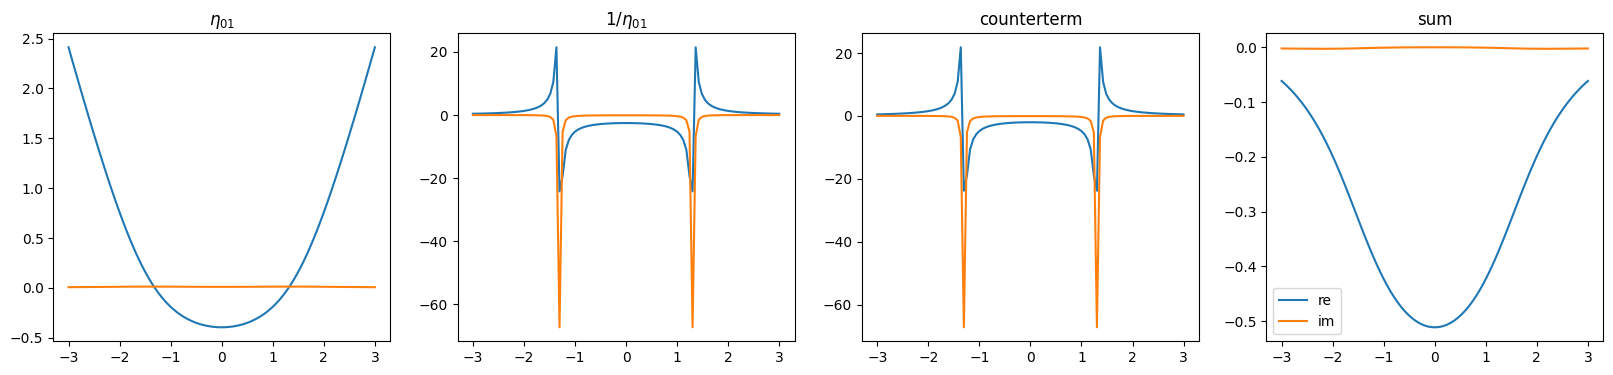

q = (-1.500+0.000j -2.000+0.000j)
m = (1.000+0.100j)
naive integral:      -2.560-8.206j
threshold subtacted: -0.976-4.075j


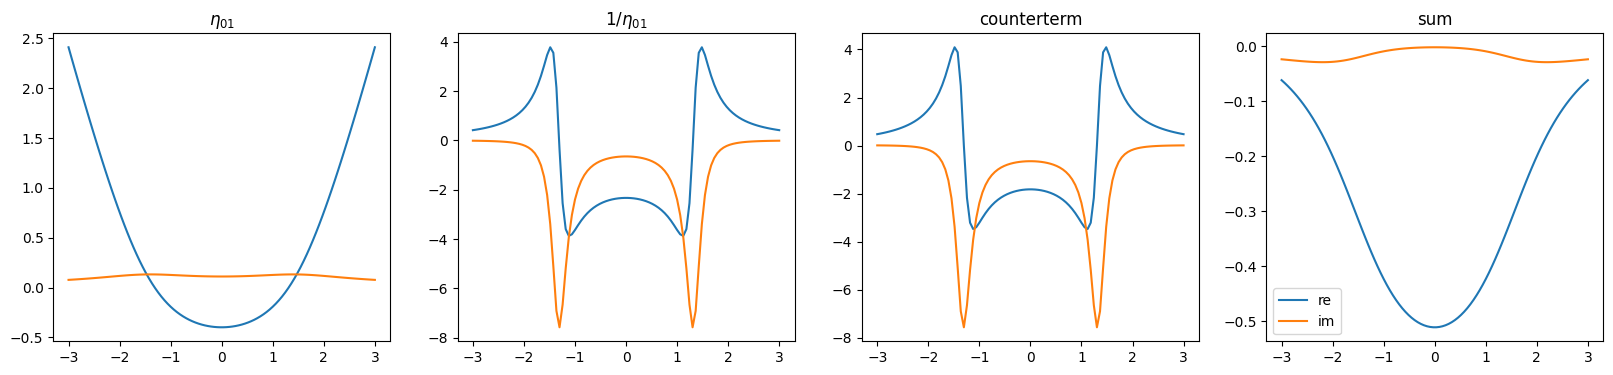

q = (-1.500+0.000j -2.000+0.000j)
m = (1.000+0.200j)
naive integral:      -1.265-7.551j
threshold subtacted: -0.343-3.719j


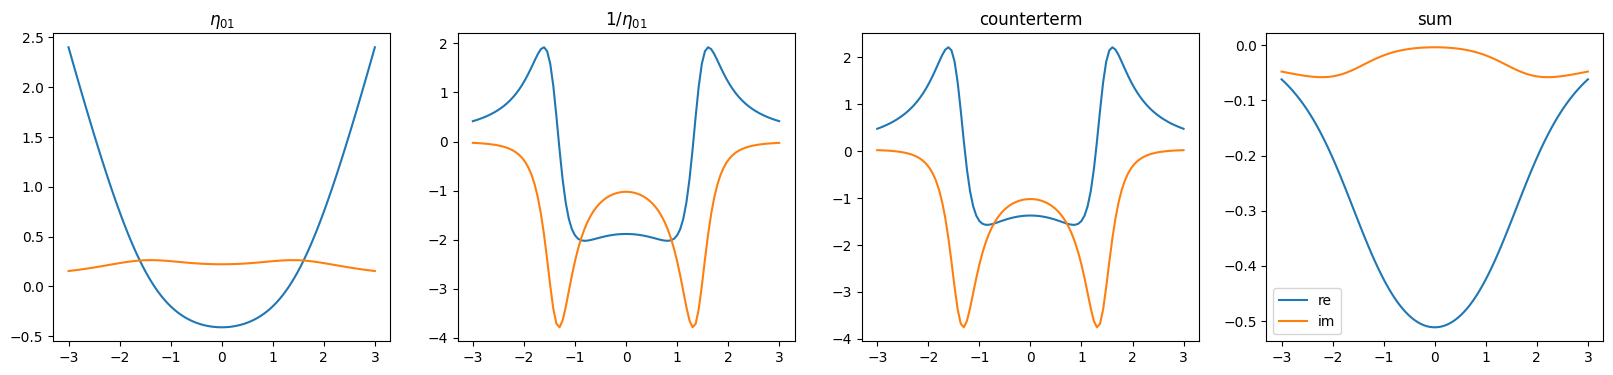

In [13]:
qs = np.array([-1,2,0])+0j
qt = np.array([-0,4,0])+0j
m = 1

xs = np.linspace(-3,3,100)
rad = 1000
i = 0
j = 1

plot_counterterm(i, j, xs, rad)


m = 1+0.01j
plot_counterterm(i, j, xs, rad)

m = 1+0.1j
plot_counterterm(i, j, xs, rad)

m = 1+0.2j
plot_counterterm(i, j, xs, rad)